## Callbacks to be called before/after cell execution


In [ ]:
#| default_exp utils.cell_cbs

In [ ]:
#| export
import sys
from IPython import get_ipython
from friendlly.utils import PassthroughCapturer, TeeIO, SaveTraceback

In [ ]:
from PIL import Image

In [ ]:
#| export
class ExecCBs:
    stdout = None
    stderr = None
    result = None # The thing at the end of the cell
    display =None
    saved_streams = None

    def __init__(self, after_run=None, once=True):
        self.do_after_run = after_run
        self.once = once

    def pre_callback(self, info=None):
        # print("# pre")
        ip = get_ipython()
        # This will capture diplay() and friends
        self.display = PassthroughCapturer()
        self.display.start()

        # This will capture stdout/stderr
        sys.stdout = self.stdout = TeeIO(sys.stdout)
        sys.stderr = self.stderr = TeeIO(sys.stderr)


        self.tracebacks = SaveTraceback(ip._showtraceback)
        self.tracebacks.register()

        # We register the callback here, so it does not run after the cell
        # that registered the pre

        ip.events.register("post_run_cell", self.post_callback)
        # We get the result in the post callback info, no need to register anything else.

    def post_callback(self, result):
        # Post will be called in the cell that registers the
        # callbacks, but it wuld not have ran pre.
        # print("# post")
        self.result = result

        if self.stdout:
            sys.stdout = self.stdout._stream
            sys.stderr = self.stderr._stream

        if self.display:
            self.display.stop()

        if self.tracebacks:
            self.tracebacks.unregister()

        if self.once:
            self.unregister()

        if self.do_after_run:
            self.do_after_run(
                self.stdout.getvalue(),
                self.stderr.getvalue(),
                self.display.get_outputs(),
                result,
                self.tracebacks.tracebacks
            )

    def register(self):
        ip = get_ipython()
        ip.events.register("pre_run_cell", self.pre_callback)


    def unregister(self):
        try:
            ip = get_ipython()
            ip.events.unregister("pre_run_cell", self.pre_callback)
            ip.events.unregister("post_run_cell", self.post_callback)
        except: pass # In case unregister was aclled before a cell ran, and we never regisstered pre.


In [ ]:

def do_after_run(stdout, stderr, display, result, tracebacks):
    print("stdout", stdout)
    print("stderr", stderr)
    print("display", display)
    print("result", result)
    print("tracebacks", tracebacks)

cbs = ExecCBs(do_after_run)
cbs.register()

Hello


World


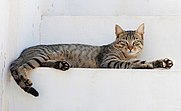

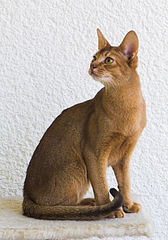

stdout Hello

stderr World

display [{'text/plain': '<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=181x111>', 'image/png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\xb5\x00\x00\x00o\x08\x02\x00\x00\x00%\x94\x16\xb7\x00\x00q\x14IDATx\x01\xad\xbd\x07\x9c\x9c\xc7q\xe0\xbbafvfgv6\xe7\x84\x05\x16\x19\x04@\x00\x04\t\x82\x01`\x14\x83D\x8bV\xa2d+X\xd9\x96\xed\x93u\x96,\xe9$?=[\xe1\'\x9f\xee\x9d\x9f\x95\xacg[V0\x95(Q\x143E\x82\t9g`\xb1\x0b\xecbs\xce\x937\xdc\xbf\xba\xbe\xe9\xfd6\x80\xd2\xf3]\x13\xec\xed\xaf\xba\xba\xba\xba\xba\xba\xba:|\xdfd\x8e\x8e\x8ef\x980;?\xccL\xa7fL 3+++33\x93\x04($\x00\xcf\xcedfgggfg\x99\xa2\xe4K\x10\x84\x99Lp\xa6ggL\xa9lA\xce\x9c\x9d\x9a\x9a\xf2z\xbd\xc9drvj\xda\xef\xf7\xa7R)\xd2\xe0\x83\x991cj\xcd\x986t$"\x17\xe4\xe9\xa9Y\x9f\xcf7=;\x0bZ,\x9a\x90\xba<\xd9\x16g6S8\xc9\xc8\x90Z2f2)\x02\x1auQ\x11\x00\x90\x89A\x00\x02\x9c h\x06\xa2@\xd2d\x19\x98\xa1`\xb2\xe0\xd5@$r%\xcdS\xfaYKil\x18\xb0%\\\x89YS]\xa64,s\x166L\x15\x99\xc4\xdaT\xda\x04t\x1a"N\xc8\xf2\xb9\n[\

In [ ]:
#| eval: false
from PIL import Image
print("Hello")
print("World", file=sys.stderr)
display(Image.open("cat.jpg"))
# 1/0
Image.open("cat2.jpg")

In [ ]:
ip =get_ipython()
ip.display_formatter.format(Image.open("cat.jpg"))
# ip.display_formatter.mimebundle_formatter(ip.display_formatter.format(Image.open("cat.jpg")))
# cbs.result

({'text/plain': '<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=181x111>',
  'image/png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\xb5\x00\x00\x00o\x08\x02\x00\x00\x00%\x94\x16\xb7\x00\x00q\x14IDATx\x01\xad\xbd\x07\x9c\x9c\xc7q\xe0\xbbafvfgv6\xe7\x84\x05\x16\x19\x04@\x00\x04\t\x82\x01`\x14\x83D\x8bV\xa2d+X\xd9\x96\xed\x93u\x96,\xe9$?=[\xe1\'\x9f\xee\x9d\x9f\x95\xacg[V0\x95(Q\x143E\x82\t9g`\xb1\x0b\xecbs\xce\x937\xdc\xbf\xba\xbe\xe9\xfd6\x80\xd2\xf3]\x13\xec\xed\xaf\xba\xba\xba\xba\xba\xba\xba:|\xdfd\x8e\x8e\x8ef\x980;?\xccL\xa7fL 3+++33\x93\x04($\x00\xcf\xcedfgggfg\x99\xa2\xe4K\x10\x84\x99Lp\xa6ggL\xa9lA\xce\x9c\x9d\x9a\x9a\xf2z\xbd\xc9drvj\xda\xef\xf7\xa7R)\xd2\xe0\x83\x991cj\xcd\x986t$"\x17\xe4\xe9\xa9Y\x9f\xcf7=;\x0bZ,\x9a\x90\xba<\xd9\x16g6S8\xc9\xc8\x90Z2f2)\x02\x1auQ\x11\x00\x90\x89A\x00\x02\x9c h\x06\xa2@\xd2d\x19\x98\xa1`\xb2\xe0\xd5@$r%\xcdS\xfaYKil\x18\xb0%\\\x89YS]\xa64,s\x166L\x15\x99\xc4\xdaT\xda\x04t\x1a"N\xc8\xf2\xb9\n[\xc6\x90\xb9\xc7\r\xb7i\x84O\x8b\xa

In [ ]:
ip.form

In [ ]:
from IPython.core.formatters import format_display_data

[<matplotlib.lines.Line2D>]

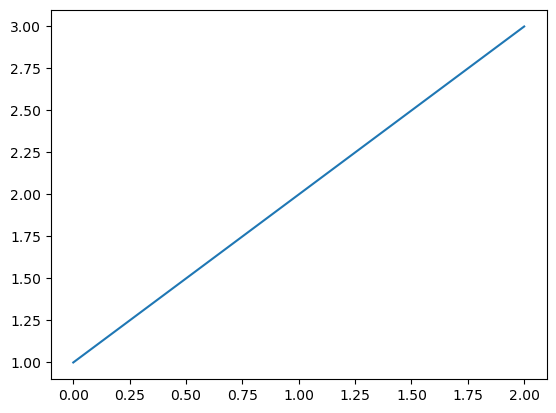

In [ ]:
from matplotlib import pyplot as plt

fig = plt.figure()
plt.plot([1,2,3])

In [ ]:
format = get_ipython().display_formatter.format
format(Image.open("cat.jpg"))

({'text/plain': '<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=181x111>',
  'image/png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\xb5\x00\x00\x00o\x08\x02\x00\x00\x00%\x94\x16\xb7\x00\x00q\x14IDATx\x01\xad\xbd\x07\x9c\x9c\xc7q\xe0\xbbafvfgv6\xe7\x84\x05\x16\x19\x04@\x00\x04\t\x82\x01`\x14\x83D\x8bV\xa2d+X\xd9\x96\xed\x93u\x96,\xe9$?=[\xe1\'\x9f\xee\x9d\x9f\x95\xacg[V0\x95(Q\x143E\x82\t9g`\xb1\x0b\xecbs\xce\x937\xdc\xbf\xba\xbe\xe9\xfd6\x80\xd2\xf3]\x13\xec\xed\xaf\xba\xba\xba\xba\xba\xba\xba:|\xdfd\x8e\x8e\x8ef\x980;?\xccL\xa7fL 3+++33\x93\x04($\x00\xcf\xcedfgggfg\x99\xa2\xe4K\x10\x84\x99Lp\xa6ggL\xa9lA\xce\x9c\x9d\x9a\x9a\xf2z\xbd\xc9drvj\xda\xef\xf7\xa7R)\xd2\xe0\x83\x991cj\xcd\x986t$"\x17\xe4\xe9\xa9Y\x9f\xcf7=;\x0bZ,\x9a\x90\xba<\xd9\x16g6S8\xc9\xc8\x90Z2f2)\x02\x1auQ\x11\x00\x90\x89A\x00\x02\x9c h\x06\xa2@\xd2d\x19\x98\xa1`\xb2\xe0\xd5@$r%\xcdS\xfaYKil\x18\xb0%\\\x89YS]\xa64,s\x166L\x15\x99\xc4\xdaT\xda\x04t\x1a"N\xc8\xf2\xb9\n[\xc6\x90\xb9\xc7\r\xb7i\x84O\x8b\xa